In [80]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Load Dataset

In [7]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print("Training data shape:", train_images.shape, train_labels.shape)
print("Testing data shape:", test_images.shape, test_labels.shape)

Training data shape: (60000, 28, 28) (60000,)
Testing data shape: (10000, 28, 28) (10000,)


ِDisplay Image

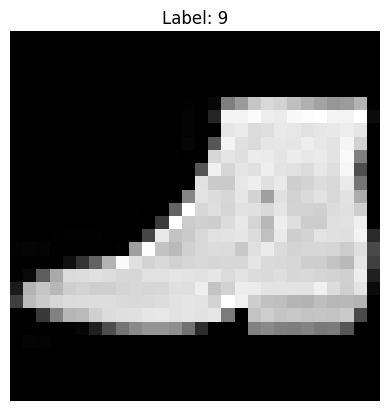

In [115]:
index = np.random.randint(0, train_images.shape[0])
image = train_images[index]
label = train_labels[index]

plt.imshow(image, cmap='gray')
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()

Standardize the Data

In [24]:
# Convert the images to floats
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

mean = np.mean(train_images, axis=0)
std = np.std(train_images, axis=0)
train_images = (train_images - mean) / std
test_images = (test_images - mean) / std

Calculate Covariance Matrix

In [27]:
# Flatten the images
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

covariance_matrix = np.cov(train_images_flat, rowvar=False)

print("Covariance matrix shape:", covariance_matrix.shape)

Covariance matrix shape: (784, 784)


Calculate Eigen Values and Eigen Vectors 

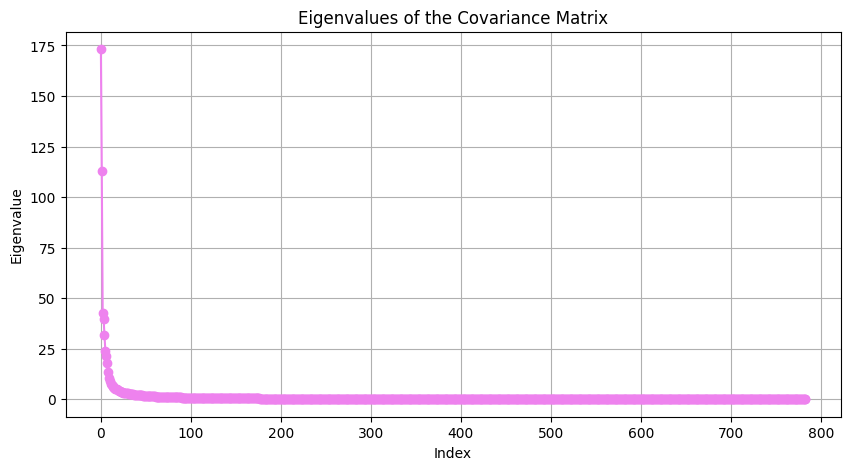

[1.73137107e+02 1.13011510e+02 4.28160568e+01 3.98957194e+01
 3.17902638e+01 2.36732136e+01 2.15412466e+01 1.81389220e+01
 1.32704106e+01 1.03338852e+01 9.17392746e+00 7.54505519e+00
 7.10693078e+00 6.75064535e+00 5.82555679e+00 5.72580155e+00
 5.18670283e+00 4.95126172e+00 4.87604233e+00 4.58102964e+00
 4.10362321e+00 4.00708081e+00 3.71247151e+00 3.52863303e+00
 3.43944832e+00 3.26995275e+00 3.12314092e+00 3.06204377e+00
 2.96100007e+00 2.92839521e+00 2.84701447e+00 2.75667830e+00
 2.63477057e+00 2.59446622e+00 2.57193336e+00 2.48916349e+00
 2.39300236e+00 2.32599226e+00 2.23208759e+00 2.21948945e+00
 2.16066961e+00 2.10226960e+00 2.05712571e+00 1.99554429e+00
 1.94066380e+00 1.88354013e+00 1.86572949e+00 1.79049548e+00
 1.74098833e+00 1.69392621e+00 1.65006329e+00 1.62441190e+00
 1.59066537e+00 1.57278936e+00 1.55909365e+00 1.52206014e+00
 1.47813710e+00 1.44986674e+00 1.41426775e+00 1.38677785e+00
 1.37071958e+00 1.34329858e+00 1.32729877e+00 1.28287350e+00
 1.26245981e+00 1.251695

In [117]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
sorted_indices = np.argsort(eig_vals)[::-1]
sorted_eig_vals = eig_vals[sorted_indices]
sorted_eig_vecs = eig_vecs[:, sorted_indices]

plt.figure(figsize=(10, 5))
plt.plot(sorted_eig_vals, marker='o', color='violet')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of the Covariance Matrix')
plt.grid(True)
plt.show()

print(sorted_eig_vals)

Find Proper Number of Components to Compress Data

Number of components to retain 95.0% of the variance: 256


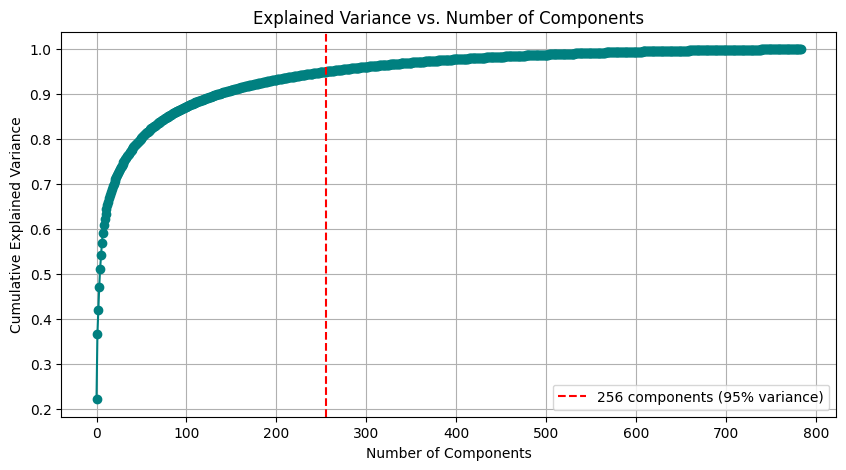

In [70]:
cumulative_variance = np.cumsum(sorted_eig_vals) / np.sum(sorted_eig_vals)

threshold = 0.95
num_components = np.argmax(cumulative_variance >= threshold) + 1
print(f'Number of components to retain {threshold*100}% of the variance: {num_components}')

plt.figure(figsize=(10, 5))
plt.plot(cumulative_variance, marker='o', color='teal')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)

plt.axvline(x=num_components-1, color='red', linestyle='--', label=f'{num_components} components (95% variance)')
plt.legend()

plt.show()

Compress Data (Projection)

In [79]:
selected_eig_vecs = sorted_eig_vecs[:, :num_components]

# Project data onto selected eigen vectors
compressed_data = np.dot(train_images_flat, selected_eig_vecs)

# Reconstruct images from compressed data
reconstructed_images_flat = np.dot(compressed_data, selected_eig_vecs.T)

num_images = train_images_flat.shape[0]
reconstructed_images = reconstructed_images_flat.reshape(num_images, 28, 28)

Compression Result

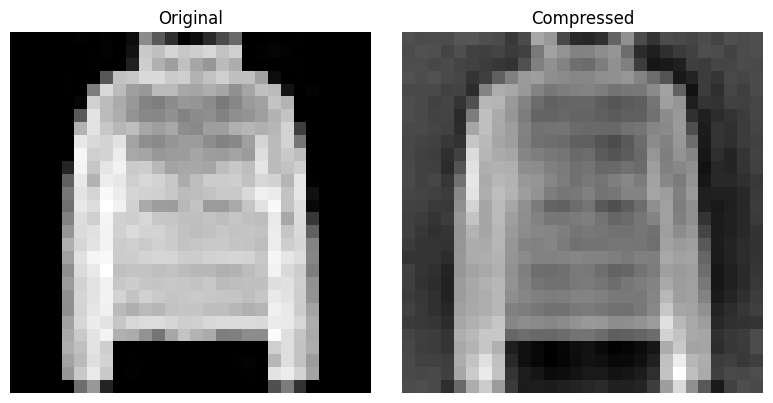

In [118]:
index = np.random.randint(0, train_images.shape[0])

image = train_images[index]
reconstructed_image = reconstructed_images[index]

plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title("Compressed")
plt.axis('off')

plt.tight_layout()
plt.show()